In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import itertools as it
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from spectral import *
def diff(a, b):
    a = np.asarray(a)
    b = np.asarray(b)
    return 2*np.linalg.norm(a - b)/np.linalg.norm(a + b)

## Check the definition of Legendre polynomials

In [2]:
N = 10
x = np.linspace(-1, 1, 100)
for order in range(3):
    y = list(it.islice(legendre.legendre_gen(x, diff=order), N))
    c = np.polynomial.legendre.legder(np.eye(N), order)
    y1 = np.polynomial.legendre.legval(x, c)
    print(diff(y, y1))

3.6542470230666037e-16
7.401776513914165e-16
3.4181774852717767e-16


## Gauss-Lobatto nodes

In [3]:
for N in (1, 2, 3, 4, 5, 100, 1000):
    def y(x):
        return (x**2 - 1)*legendre.legendre(N, x, 1)
    nodes = legendre.nodes(N)
    between_nodes = (nodes[1:] + nodes[:-1])/2
    print(np.linalg.norm(y(nodes))/np.linalg.norm(y(between_nodes)))

0.0
5.773040374903287e-17
0.0
5.031990929224875e-16
7.867223318847077e-16
5.876647418158788e-15
7.224005198883292e-14


## Basic properties

In [4]:
mesh = Legendre(10, (2, 5))
X, = mesh.grid()
u = TensorField(mesh, np.random.randn(*mesh.shape))
x = np.linspace(*mesh.endpoints, 3000)

In [5]:
print(diff(u.func, u().func))
print(diff(u.func, u(None).func))
print(diff(u.func, np.interp(X, x, u(x))))

0.0
0.0
1.5931343166268067e-06


In [6]:
mesh2 = Legendre(55, mesh.endpoints)
u2 = u.remesh(mesh2)
X2, = mesh2.grid()
diff(u2.remesh(mesh).func, u.func)

1.482836243418732e-15

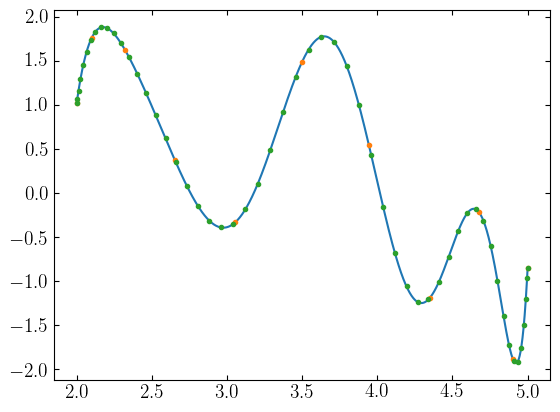

In [7]:
plt.plot(x, u(x))
plt.plot(X, u.func, '.')
plt.plot(X2, u2.func, '.')
plt.show()

## Arithmetic

In [8]:
u1 = TensorField(mesh, np.random.randn(2, 3, *mesh.shape))
u2 = TensorField(mesh, np.random.randn(3, *mesh.shape))
u3 = TensorField(mesh, np.random.randn(*mesh.shape))
c = np.random.randn()
diff((c*u1*u2*u3).func, c*u1.func*u2.func*u3.func)

0.0

In [9]:
diff((u/c).func, u.func/c)

0.0

In [10]:
[diff((u**i).func, u.func**i) for i in range(1, 5)]

[0.0, 0.0, 0.0, 0.0]

In [11]:
diff((u1 + u2 - u3 + c).func, u1.func + u2.func - u3.func + c)

0.0

In [12]:
[diff((u + c).func, u.func + c),
 diff((u - c).func, u.func - c),
 diff((c + u).func, u.func + c),
 diff((c + u).func, u.func + c),
 diff((-u).func, -u.func)]

[0.0, 0.0, 0.0, 0.0, 0.0]

## Differentiate

In [13]:
x = np.linspace(*mesh.endpoints, 10000)
du = u.diff()
diff_num = np.gradient(u(x), x, edge_order=2)
diff(diff_num, du(x))

2.943781091707394e-06

## Integrate

In [14]:
x = np.linspace(*mesh.endpoints, 3000)
int_num = sp.integrate.simps(u(x), x)
diff(u.int(), int_num)

2.686554428858999e-08

In [15]:
u2 = u.remesh(Legendre(mesh.N + 1, mesh.endpoints))
int_num = sp.integrate.simps(u2(x)**2, x)
diff((u2**2).int(), int_num)

1.2543767405499515e-08